<a href="https://colab.research.google.com/github/jaash3103/GENAI-E2324421221243014-14/blob/main/income_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [5]:
data=pd.read_csv("/content/adult (1).csv")#importing the dataset

In [6]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data.shape #no. of columns and rows

(32561, 15)

In [9]:
data.isna().sum() #checking for null values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
#checking for irrelevant features
print(data.workclass.value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [13]:
data.workclass.replace({'?':'others'}, inplace = True)

In [14]:
print(data.workclass.value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
others               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [15]:
print(data.occupation.value_counts())

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
others               1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [17]:
print(data.sex.value_counts())

Male      21790
Female    10771
Name: sex, dtype: int64


In [19]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
others               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Never-worked            7
Name: workclass, dtype: int64


In [20]:
data=data[data['occupation']!='Armed-Forces']

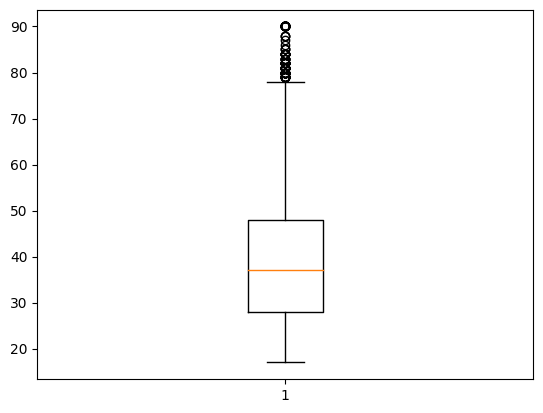

In [21]:
#visualization
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
data=data[(data['age']<=75) & (data['age']>=17)]

In [22]:
print(data.age.value_counts())

36    898
31    888
34    885
35    876
23    875
33    875
28    867
30    860
37    858
25    841
27    835
32    828
38    827
39    815
29    811
41    808
24    796
40    794
26    785
42    780
43    770
22    764
20    753
46    735
45    734
44    724
21    719
19    710
47    708
50    602
51    595
49    577
18    550
48    543
52    477
53    464
55    419
54    415
17    395
58    366
56    366
57    358
59    355
60    312
61    300
62    256
63    230
64    208
65    176
66    150
67    150
68    119
69    108
70     89
71     72
72     66
73     64
74     51
75     45
Name: age, dtype: int64


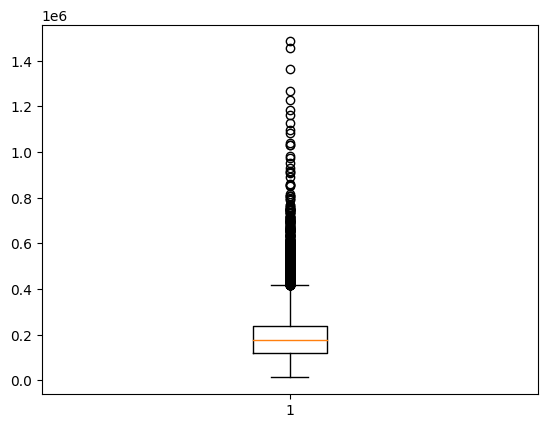

In [23]:
plt.boxplot(data['fnlwgt'])
plt.show()

In [25]:
data=data.drop(columns=['education']) #redundant information

In [26]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['fnlwgt']=encoder.fit_transform(data['fnlwgt'])
data['marital.status']=encoder.fit_transform(data['marital.status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['sex']=encoder.fit_transform(data['sex'])
data['native.country']=encoder.fit_transform(data['native.country'])

In [27]:
data


,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,7,11037,10,6,13,4,2,0,0,4356,40,39,<=50K
3,54,3,6918,4,0,5,4,4,0,0,3900,40,39,<=50K
4,41,3,16663,10,5,8,3,4,0,0,3900,40,39,<=50K
5,34,3,14020,9,0,6,4,4,0,0,3770,45,39,<=50K
6,38,3,7695,6,5,0,4,4,1,0,3770,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,18365,10,4,9,1,4,1,0,0,40,39,<=50K
32557,27,3,16342,12,2,11,5,4,0,0,0,38,39,<=50K
32558,40,3,7970,9,2,5,0,4,1,0,0,40,39,>50K
32559,58,3,7778,9,6,0,4,4,0,0,0,40,39,<=50K


In [29]:
#input and output
x=data.drop(columns=['income'])
y=data['income']


In [30]:
x

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
2,66,7,11037,10,6,13,4,2,0,0,4356,40,39
3,54,3,6918,4,0,5,4,4,0,0,3900,40,39
4,41,3,16663,10,5,8,3,4,0,0,3900,40,39
5,34,3,14020,9,0,6,4,4,0,0,3770,45,39
6,38,3,7695,6,5,0,4,4,1,0,3770,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,18365,10,4,9,1,4,1,0,0,40,39
32557,27,3,16342,12,2,11,5,4,0,0,0,38,39
32558,40,3,7970,9,2,5,0,4,1,0,0,40,39
32559,58,3,7778,9,6,0,4,4,0,0,0,40,39


In [31]:
y

2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32297, dtype: object

In [32]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [33]:
#splitting the dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23,stratify=y)

In [34]:
xtrain

array([[0.18965517, 0.42857143, 0.09236798, ..., 0.        , 0.34693878,
        0.95121951],
       [0.39655172, 0.14285714, 0.01100952, ..., 0.        , 0.5       ,
        0.95121951],
       [0.4137931 , 0.42857143, 0.44915096, ..., 0.        , 0.29591837,
        0.95121951],
       ...,
       [0.44827586, 0.85714286, 0.85440381, ..., 0.        , 0.39795918,
        0.95121951],
       [0.75862069, 0.14285714, 0.18207688, ..., 0.        , 0.34693878,
        0.95121951],
       [0.25862069, 0.14285714, 0.57804628, ..., 0.        , 0.39795918,
        0.95121951]])

In [35]:
xtest

array([[0.34482759, 0.42857143, 0.51021646, ..., 0.        , 0.55102041,
        0.95121951],
       [0.05172414, 0.42857143, 0.40497294, ..., 0.        , 0.29591837,
        0.95121951],
       [0.34482759, 0.42857143, 0.82986565, ..., 0.        , 0.5       ,
        0.        ],
       ...,
       [0.4137931 , 0.42857143, 0.36718604, ..., 0.        , 0.65306122,
        0.95121951],
       [0.48275862, 0.        , 0.61830565, ..., 0.4775023 , 0.39795918,
        0.73170732],
       [0.25862069, 0.42857143, 0.60043851, ..., 0.        , 0.39795918,
        0.95121951]])

In [40]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [41]:
predict1=knn.predict(xtest)

In [42]:
predict1

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [43]:
ytest

6520     <=50K
14304    <=50K
29550     >50K
8849     <=50K
7803     <=50K
         ...  
18948    <=50K
20554    <=50K
22999     >50K
243      <=50K
5257     <=50K
Name: income, Length: 6460, dtype: object

In [45]:
#prediction 1
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict1)

0.8128482972136223

In [46]:
#nueral network
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1,max_iter=3000)
clf.fit(xtrain,ytrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=3000,
              random_state=1)

In [47]:
predict2=clf.predict(xtest)

In [48]:
predict2

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [49]:
#prediction2
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict2)

0.8380804953560371

In [50]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)


array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [52]:
predict3=lr.predict(xtest)
predict3

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [53]:
#prediction3
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict3)

0.8185758513931889